In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


In [13]:
# mean vectors
m1 = np.array([2, 1])
m2 = np.array([-2, 1])

# covariance matrices
cov1 = np.array([[1, -1], [-1, 4]])
cov2 = np.array([[4, 0], [0, 1]])

# values of B
B_range = [0.5, 1.0, 1.5, 2.0]


In [43]:
# define the range of x and y values
x = np.linspace(-8, 8, 1000)
y = np.linspace(-8, 8, 1000)

# create a meshgrid from x and y values
X, Y = np.meshgrid(x, y)
Z = np.column_stack([X.ravel(), Y.ravel()])

In [44]:
def mahalanobis_dist(point, mean, cov, coordinate):
    """
    Calculate the Mahalanobis distance between a point and a mean vector
    with covariance matrix cov.
    """
    inv_cov = np.linalg.inv(cov)
    diff = point - mean
    dis = np.sqrt(np.sum(diff @ inv_cov * diff, axis=1)).reshape(coordinate.shape)
    return dis


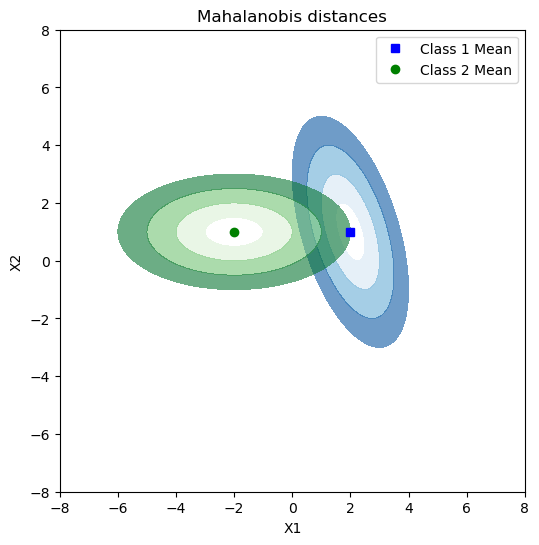

In [47]:
# define the values of B
B_values = [0.5, 1.0, 1.5, 2.0]

# plot the distance
d1 = mahalanobis_dist(Z, m1, cov1, X)
d2 = mahalanobis_dist(Z, m2, cov2, Y)

# plot the mean points
plt.figure(figsize=(6, 6))
plt.plot(m1[0], m1[1], 'bs', label='Class 1 Mean')
plt.plot(m2[0], m2[1], 'go', label='Class 2 Mean')

# plot Mahalanobis distances
plt.contourf(X, Y, d1, alpha=0.6, cmap='Blues', levels=B_range)
plt.contourf(X, Y, d2, alpha=0.6, cmap='Greens', levels=B_range)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Mahalanobis distances')
plt.legend()
plt.show()


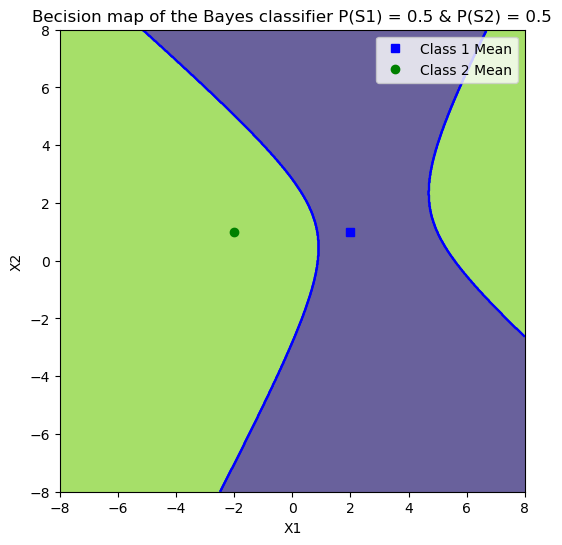

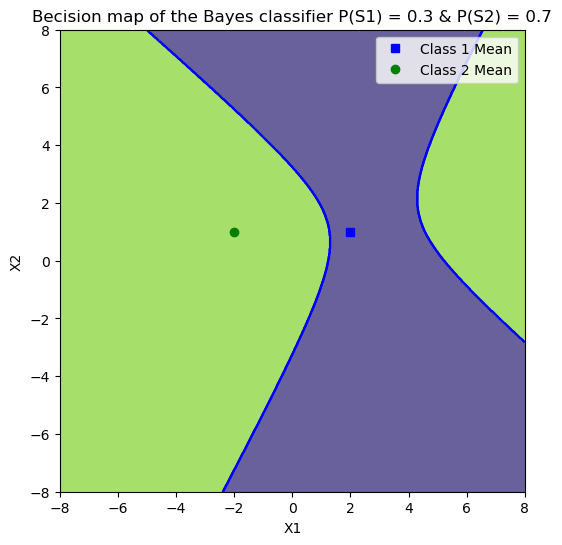

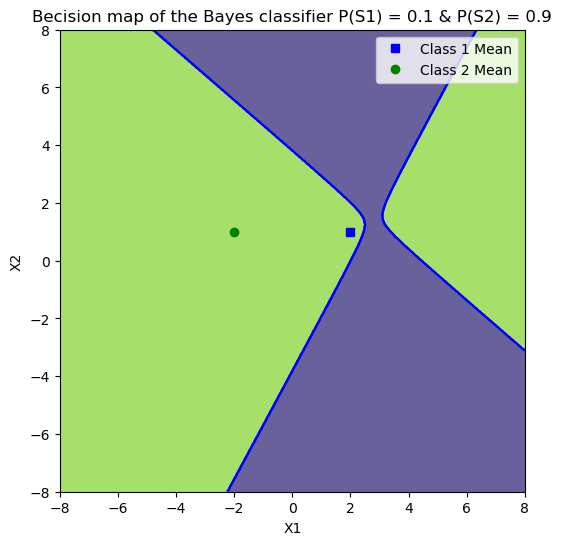

In [55]:
def plot_Bayes(s1, s2):
    # calculate Mahalanobis distances
    d1_baye = np.sum((Z - m1) @ np.linalg.inv(cov1) * (Z - m1), axis=1) 
    d2_baye = np.sum((Z - m2) @ np.linalg.inv(cov2) * (Z - m2), axis=1)

    
    # decision boundary
    decisionmap = d1_baye - d2_baye - 2 * np.log(s1 / s2) - np.log(np.linalg.det(cov1) / np.linalg.det(cov2))
        
    XY = np.where(decisionmap >= 0, 2, 1).reshape(X.shape)
    # plot the mean points
    plt.figure(figsize=(6, 6))
    plt.plot(m1[0], m1[1], 'bs', label='Class 1 Mean')
    plt.plot(m2[0], m2[1], 'go', label='Class 2 Mean')
    
    # plot decision boundary
    plt.contour(X, Y, XY, colors='blue', levels=B_range) 
    plt.contourf(X, Y, XY, alpha=0.8, levels=B_range) 
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Becision map of the Bayes classifier P(S1) = {s1} & P(S2) = {s2}')
    plt.legend()
    plt.show()
              
plot_Bayes(0.5, 0.5)
plot_Bayes(0.3, 0.7)
plot_Bayes(0.1, 0.9)